In [1]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
!unzip "/content/archive (2).zip"

Archive:  /content/archive (2).zip
  inflating: Real Estate Data V21.csv  


In [3]:
import pandas as pd
import re
df = pd.read_csv("Real Estate Data V21.csv")
def extract_bedrooms_regex(text):
    match = re.search(r'(\d+)\s*bhk', str(text), re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None
df['Bedrooms'] = df['Description'].apply(extract_bedrooms_regex)
df = df.drop(columns=['Description'])
df['Bedrooms'] = df['Bedrooms'].astype('Int64')
df.to_csv("Real_Estate_with_Bedrooms.csv", index=False)

In [4]:
df1=pd.read_csv("Real_Estate_with_Bedrooms.csv")

In [5]:
df1.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Baths,Balcony,Bedrooms
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,Yes,4.0
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,Yes,10.0
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,No,3.0
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,Yes,7.0
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,3,Yes,2.0


In [6]:
df1.tail()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Baths,Balcony,Bedrooms
14523,"Krishna Park Extension, Tilak Nagar,New Delhi","2 BHK Flat for sale in Tilak Nagar, New Delhi",₹40.0 L,"Krishna Park Extension, Tilak Nagar,New Delhi",1053,3800.0,3,Yes,2.0
14524,"Rawta, Jaffarpur Kalan,New Delhi",1 BHK Independent House for sale in Jaffarpur ...,₹14.0 L,"Rawta, Jaffarpur Kalan,New Delhi",472,2970.0,2,Yes,1.0
14525,"Rani Garden, Geeta Colony,New Delhi","1 BHK Flat for sale in Geeta Colony, New Delhi",₹30.0 L,"Rani Garden, Geeta Colony,New Delhi",378,7940.0,1,Yes,1.0
14526,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...","3 BHK Flat for sale in Sector 16 Rohini, New D...",₹60.0 L,"Lig flat rohini,Sector 16E, Sector 16 Rohini,N...",700,8570.0,2,Yes,3.0
14527,"Sector 3B, Sector 3 Rohini,New Delhi",1 RK Independent House for sale in Sector 3 Ro...,₹55.0 L,"Sector 3B, Sector 3 Rohini,New Delhi",344,15990.0,1,Yes,NaN


In [7]:
df1.shape

(14528, 9)

In [8]:
df1.columns

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Baths', 'Balcony', 'Bedrooms'],
      dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Baths           14528 non-null  int64  
 7   Balcony         14528 non-null  object 
 8   Bedrooms        13610 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1021.6+ KB


In [10]:
df1.describe()

,Total_Area,Price_per_SQFT,Baths,Bedrooms
count,14528.000000,14528.000000,14528.000000,13610.000000
mean,1297.916988,11719.456222,2.751239,2.631521
std,1245.694305,49036.068632,0.898243,1.622394
min,70.000000,0.000000,1.000000,1.000000
25%,650.000000,4480.000000,2.000000,2.000000
50%,1000.000000,6050.000000,3.000000,2.000000
75%,1439.000000,9312.500000,3.000000,3.000000
max,35000.000000,999000.000000,6.000000,17.000000


In [11]:
df.isnull().sum()

,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Baths,0
Balcony,0
Bedrooms,918


In [12]:
df.dtypes

,0
Name,object
Property Title,object
Price,object
Location,object
Total_Area,int64
Price_per_SQFT,float64
Baths,int64
Balcony,object
Bedrooms,Int64


In [13]:
df.corr(numeric_only=True)

,Total_Area,Price_per_SQFT,Baths,Bedrooms
Total_Area,1.000000,0.153151,0.529589,0.567878
Price_per_SQFT,0.153151,1.000000,0.005869,0.017427
Baths,0.529589,0.005869,1.000000,0.437167
Bedrooms,0.567878,0.017427,0.437167,1.000000


IT IS USED TO PRINT THE CORRELEATION MATRIX FOR THE NUMERICAL COLUMNS.

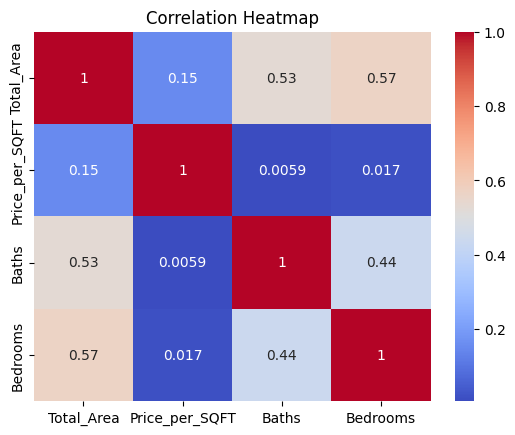

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

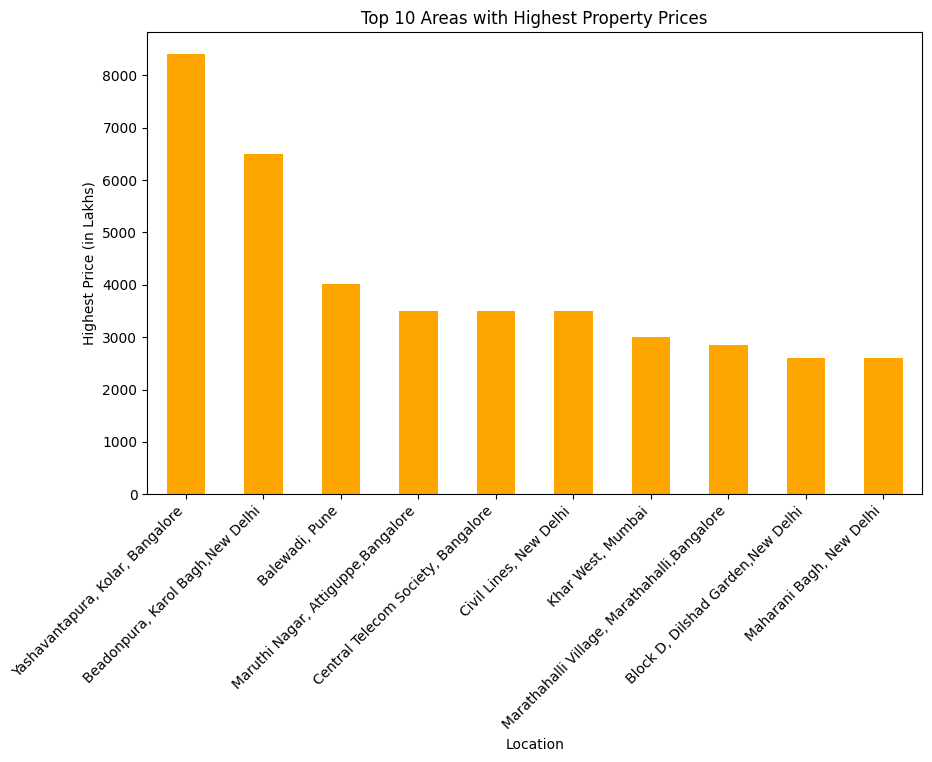

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
top_areas = df_clean.groupby("Location")["Price_Lakhs"].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_areas.plot(kind="bar", color="orange")
plt.xlabel("Location")
plt.ylabel("Highest Price (in Lakhs)")
plt.title("Top 10 Areas with Highest Property Prices")
plt.xticks(rotation=45, ha="right")
plt.show()

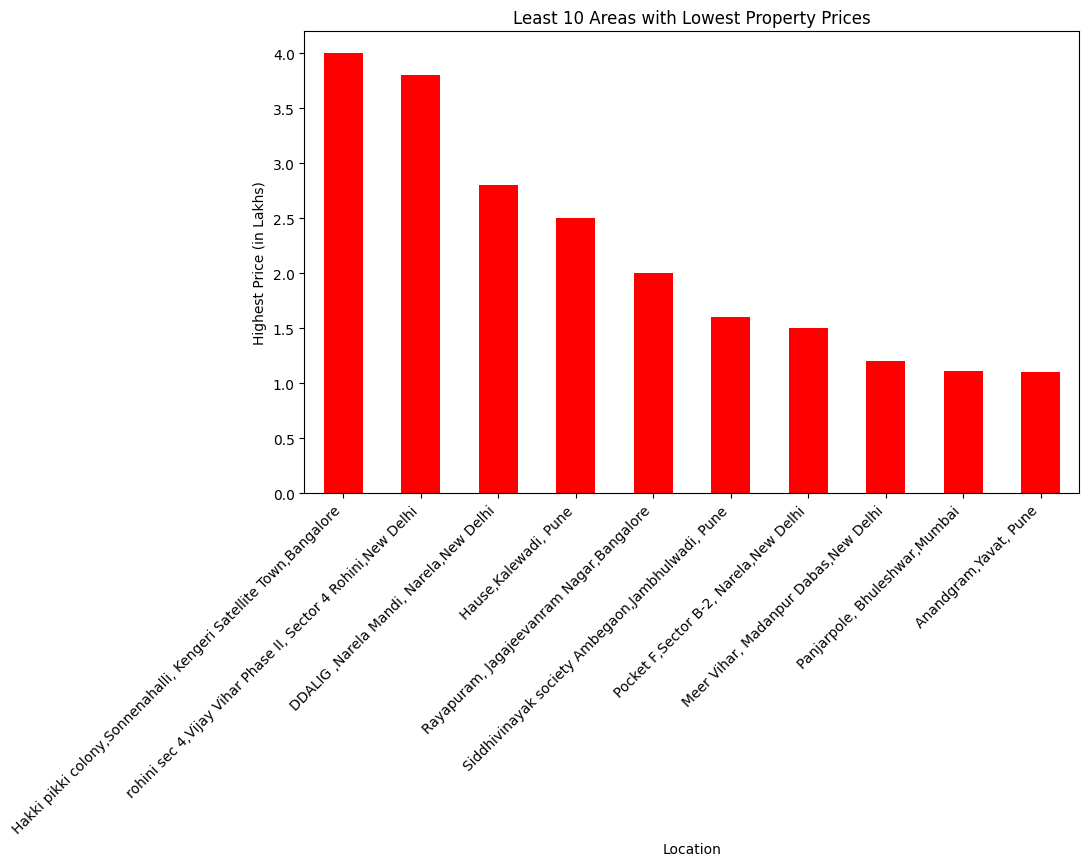

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
least_areas = df_clean.groupby("Location")["Price_Lakhs"].max().sort_values(ascending=False).tail(10)
plt.figure(figsize=(10,6))
least_areas.plot(kind="bar", color="red")
plt.xlabel("Location")
plt.ylabel("Highest Price (in Lakhs)")
plt.title("Least 10 Areas with Lowest Property Prices")
plt.xticks(rotation=45, ha="right")
plt.show()

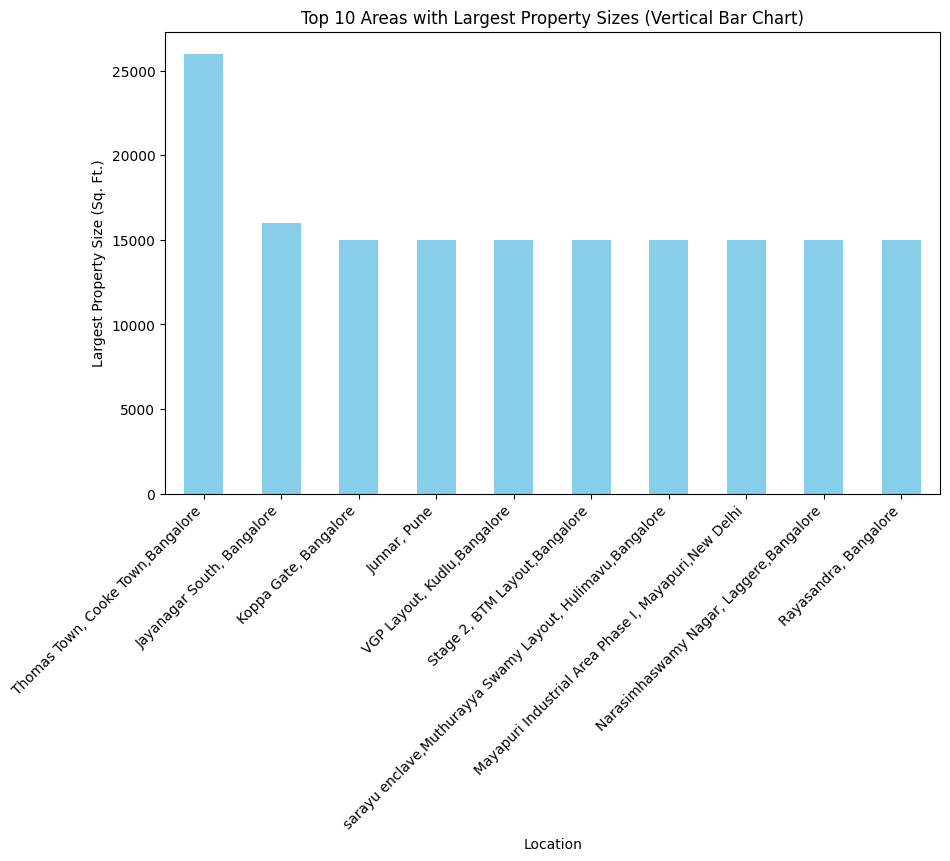

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
top_areas_sqft = df_clean.groupby("Location")["Total_Area"].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_areas_sqft.plot(kind="bar", color="skyblue")
plt.xlabel("Location")
plt.ylabel("Largest Property Size (Sq. Ft.)")
plt.title("Top 10 Areas with Largest Property Sizes (Vertical Bar Chart)")
plt.xticks(rotation=45, ha="right")
plt.show()

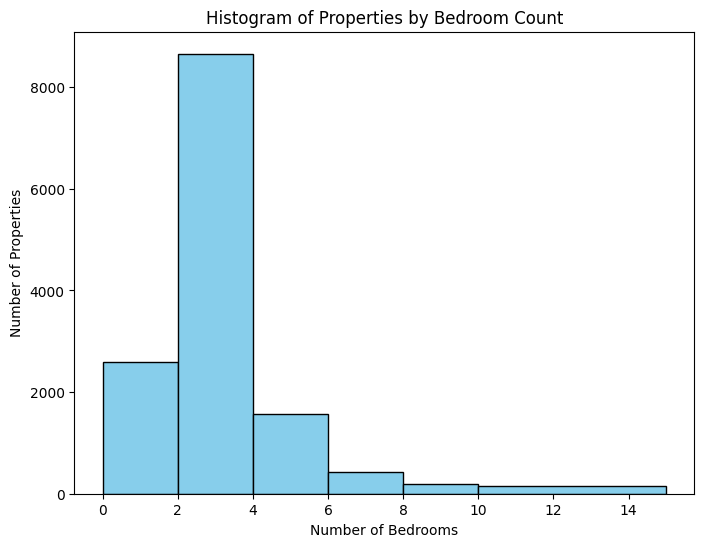

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
bins = [0, 2, 4, 6, 8, 10, 15]
labels = ["1-2", "3-4", "5-6", "7-8", "9-10", "11-15"]
df_clean.loc[:, "Bedroom_Bins"] = pd.cut(
    df_clean["Bedrooms"],
    bins=bins,
    labels=labels,
    include_lowest=True
)
plt.figure(figsize=(8,6))
plt.hist(
    df_clean["Bedrooms"],
    bins=bins,
    edgecolor="black",
    color="skyblue"
)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Properties")
plt.title("Histogram of Properties by Bedroom Count")
plt.show()

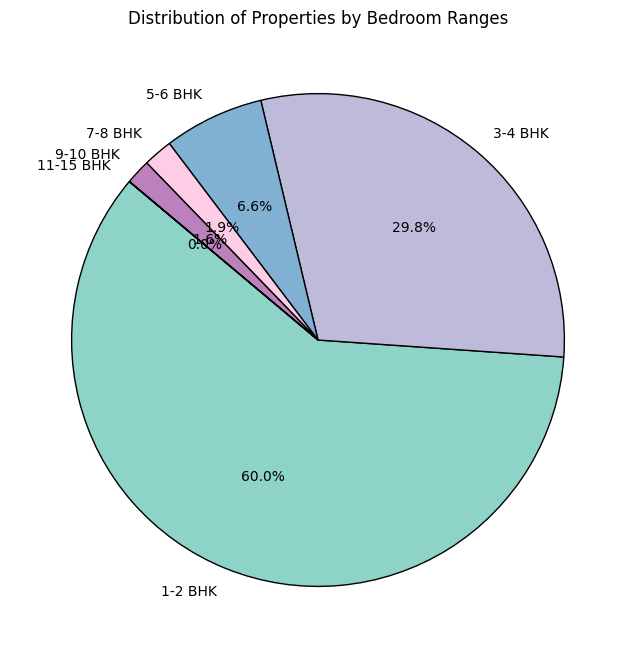

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
df_clean = df_clean.copy()
bins = [0, 2, 4, 6, 8, 10, 15]
labels = ["1-2 BHK", "3-4 BHK", "5-6 BHK", "7-8 BHK", "9-10 BHK", "11-15 BHK"]
df_clean["Bedroom_Bins"] = pd.cut(
    df_clean["Bedrooms"],
    bins=bins,
    labels=labels,
    include_lowest=True
)
bedroom_bin_counts = df_clean["Bedroom_Bins"].value_counts().sort_index()
plt.figure(figsize=(8,8))
bedroom_bin_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=140,
    colormap="Set3",
    wedgeprops={"edgecolor": "black"}
)
plt.ylabel("")
plt.title("Distribution of Properties by Bedroom Ranges")
plt.show()